In [159]:
# imports required to run the code.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import sklearn

In [160]:
# preparing dataset.

dfo = pd.read_csv('healthcare-dataset-stroke-data.csv')
dfo = dfo.fillna(0)

# ---------------------------------------- #

dfo.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [169]:
# preparing dataset.

dfo = pd.read_csv('healthcare-dataset-stroke-data.csv')
dfo = dfo.fillna(0)

dfo = dfo.sort_values(by=['bmi'], ascending=True) # what happened here..?
dfo = dfo.reset_index(drop = True)

# ---------------------------------------- #

df = pd.get_dummies(dfo) # converte dados não numéricos.
df = df.drop(columns=['gender_Other'])

# ---------------------------------------- #
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,34248,50.0,1,0,81.96,0.0,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
1,29224,30.0,0,0,91.23,0.0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
2,49894,78.0,1,1,206.53,0.0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,37526,68.0,1,1,233.30,0.0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
4,29095,71.0,1,0,93.60,0.0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0


In [170]:
dfa = df.drop(columns=['stroke','id'])
# dfa = dfa.drop(columns=['work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children'])

X_train, X_test, y_train, y_test = train_test_split(dfa, df['stroke'], train_size=0.2)
len(X_train)

1022

In [171]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)

# gives a value 0 to 1, showing how accurate its results are
clf.score(X_test, y_test)

0.08187274190513194

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

clf = LinearRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# gives a value 0 to 1, showing how accurate its results are
r2_score(y_test, y_pred)

0.08187274190513194

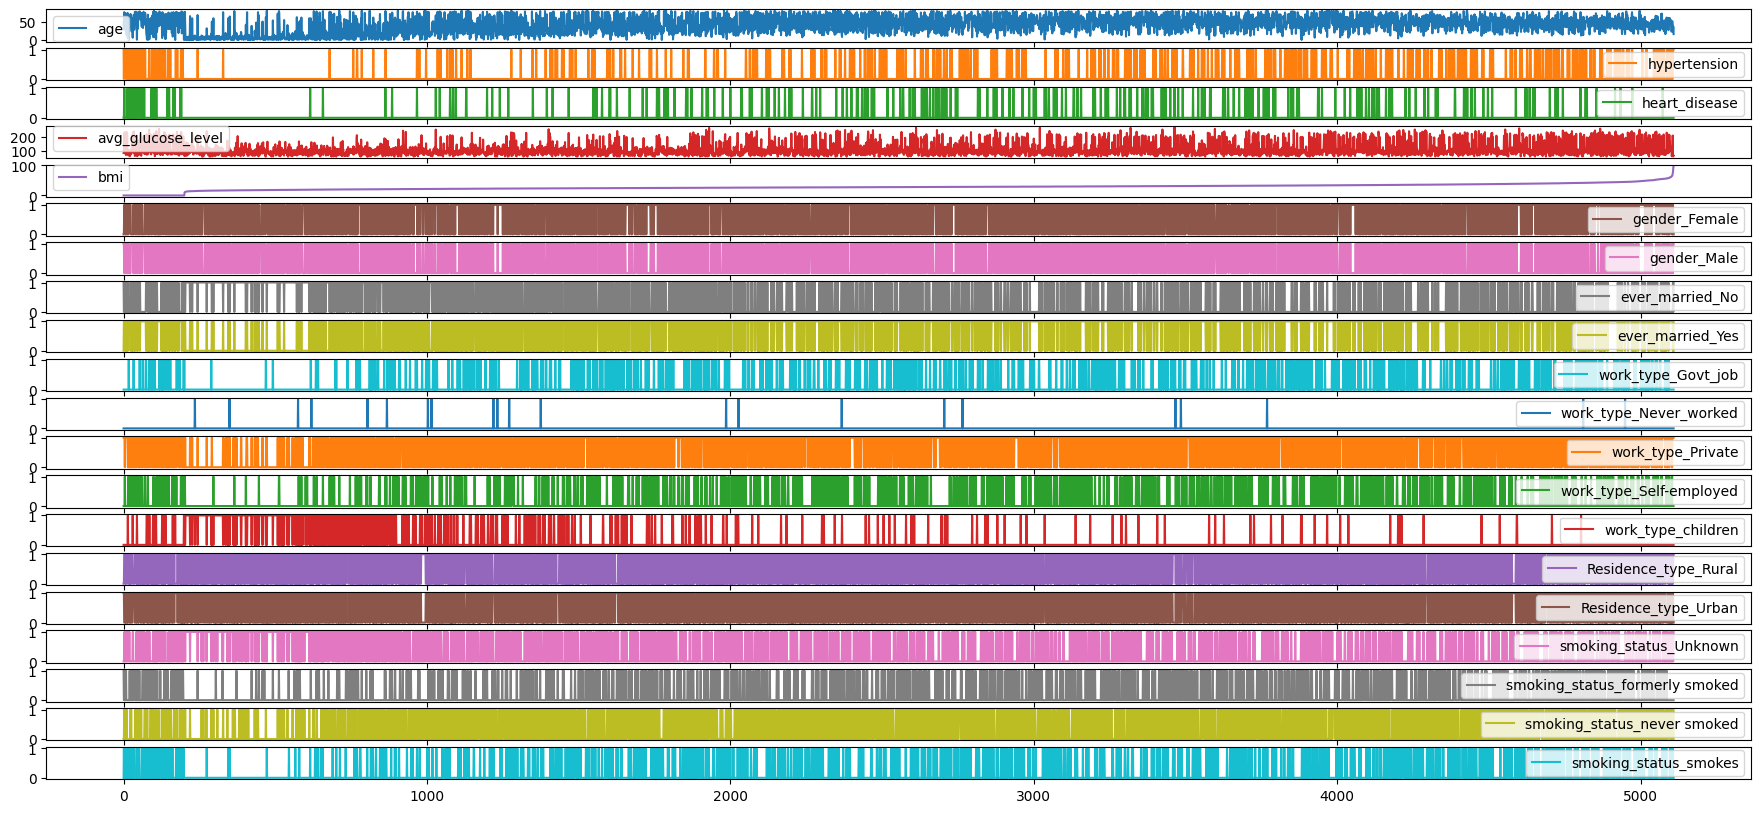

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

dfa.plot(subplots=True, figsize=(22,10))
plt.show()

In [166]:
# Função para avaliar o classificador.
# sklearn.metrics.accuracy_score(y_true, y_pred)

In [167]:
# ---------------------------------------- #

# df_rotulo = df['id']
# df_features = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]

# tree = DecisionTreeClassifier(criterion='entropy')
# tree.fit(df_features, df_rotulo)

# ---------------------------------------- #

In [168]:
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# plt.figure( figsize=(20,20) )
# a = plot_tree(tree, feature_names=df_features.columns, fontsize=2, 
#               node_ids=False, impurity=False, filled=True)